<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/%EB%B0%A9%ED%95%99_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%8C%8C%EC%83%9D%EB%B3%80%EC%88%98_%EC%83%9D%EC%84%B1%EC%99%84%EB%A3%8C_%EB%B0%95%EB%AF%BC%EC%B1%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd

In [33]:
train = pd.read_csv('/content/train.csv')

In [34]:
train.head()

,영업일자,영업장명_메뉴명,매출수량
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102676 entries, 0 to 102675
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   영업일자      102676 non-null  object
 1   영업장명_메뉴명  102676 non-null  object
 2   매출수량      102676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


In [36]:
train['영업장명_메뉴명'].value_counts()

,count
영업장명_메뉴명,
느티나무 셀프BBQ_1인 수저세트,532
느티나무 셀프BBQ_BBQ55(단체),532
"느티나무 셀프BBQ_대여료 30,000원",532
"느티나무 셀프BBQ_대여료 60,000원",532
"느티나무 셀프BBQ_대여료 90,000원",532
...,...
화담숲카페_메밀미숫가루,532
화담숲카페_아메리카노 HOT,532
화담숲카페_아메리카노 ICE,532


In [37]:
print(train['영업장명_메뉴명'].value_counts().to_string())

영업장명_메뉴명
느티나무 셀프BBQ_1인 수저세트                    532
느티나무 셀프BBQ_BBQ55(단체)                  532
느티나무 셀프BBQ_대여료 30,000원                532
느티나무 셀프BBQ_대여료 60,000원                532
느티나무 셀프BBQ_대여료 90,000원                532
느티나무 셀프BBQ_본삼겹 (단품,실내)                532
느티나무 셀프BBQ_스프라이트 (단체)                 532
느티나무 셀프BBQ_신라면                        532
느티나무 셀프BBQ_쌈야채세트                      532
느티나무 셀프BBQ_쌈장                         532
느티나무 셀프BBQ_육개장 사발면                    532
느티나무 셀프BBQ_일회용 소주컵                    532
느티나무 셀프BBQ_일회용 종이컵                    532
느티나무 셀프BBQ_잔디그늘집 대여료 (12인석)           532
느티나무 셀프BBQ_잔디그늘집 대여료 (6인석)            532
느티나무 셀프BBQ_잔디그늘집 의자 추가                532
느티나무 셀프BBQ_참이슬 (단체)                   532
느티나무 셀프BBQ_친환경 접시 14cm                532
느티나무 셀프BBQ_친환경 접시 23cm                532
느티나무 셀프BBQ_카스 병(단체)                   532
느티나무 셀프BBQ_콜라 (단체)                    532
느티나무 셀프BBQ_햇반                         532
느티나무 셀프BBQ_허브솔트                       532
담하_(단체) 공깃밥              

In [38]:
# '_'를 기준으로 딱 한 번만 나누어(n=1) 새로운 데이터프레임 생성
split_data = train['영업장명_메뉴명'].str.split('_', n=1, expand=True)

# 새로운 컬럼으로 할당
train['영업장명'] = split_data[0]
train['메뉴명'] = split_data[1]

# 결과 확인
print(train[['영업장명', '메뉴명']].head())

         영업장명      메뉴명
0  느티나무 셀프BBQ  1인 수저세트
1  느티나무 셀프BBQ  1인 수저세트
2  느티나무 셀프BBQ  1인 수저세트
3  느티나무 셀프BBQ  1인 수저세트
4  느티나무 셀프BBQ  1인 수저세트


In [39]:
# 컬럼 삭제
train = train.drop(columns=['영업장명_메뉴명'])

In [40]:
train[['메뉴명']].value_counts()

,count
메뉴명,
스프라이트,2660
공깃밥,1596
콜라,1596
느린마을 막걸리,1064
아메리카노(ICE),1064
...,...
해산물 토마토 스파게티,532
햇반,532
허브솔트,532


겹치는 메뉴들이 있음

In [41]:
# 영업일자를 datetime 형식으로 변환
train['영업일자'] = pd.to_datetime(train['영업일자'])

# '연도', '월', '연월' 컬럼 생성
train['연도'] = train['영업일자'].dt.year
train['월'] = train['영업일자'].dt.month
train['일'] = train['영업일자'].dt.day

In [42]:
# 요일 정보 추출 (0=월요일, 6=일요일)
train['요일_숫자'] = train['영업일자'].dt.weekday

# 요일 이름 추출 (한글로 변환)
weekday_list = ['월', '화', '수', '목', '금', '토', '일']
train['요일'] = train['영업일자'].dt.weekday.apply(lambda x: weekday_list[x])

# 주말 여부 생성
train['주말여부'] = train['요일_숫자'].apply(lambda x: 1 if x >= 5 else 0)

# 결과 확인
print(train[['연도', '월', '요일', '주말여부']].head())

     연도  월 요일  주말여부
0  2023  1  일     1
1  2023  1  월     0
2  2023  1  화     0
3  2023  1  수     0
4  2023  1  목     0


In [43]:
# 컬럼 순서 재배치
cols = ['영업일자', '연도', '월', '일', '요일', '주말여부', '영업장명', '메뉴명', '매출수량']
train = train[cols]

In [44]:
train.head()

,영업일자,연도,월,일,요일,주말여부,영업장명,메뉴명,매출수량
0,2023-01-01,2023,1,1,일,1,느티나무 셀프BBQ,1인 수저세트,0
1,2023-01-02,2023,1,2,월,0,느티나무 셀프BBQ,1인 수저세트,0
2,2023-01-03,2023,1,3,화,0,느티나무 셀프BBQ,1인 수저세트,0
3,2023-01-04,2023,1,4,수,0,느티나무 셀프BBQ,1인 수저세트,0
4,2023-01-05,2023,1,5,목,0,느티나무 셀프BBQ,1인 수저세트,0


In [45]:
train.tail()

,영업일자,연도,월,일,요일,주말여부,영업장명,메뉴명,매출수량
102671,2024-06-11,2024,6,11,화,0,화담숲카페,현미뻥스크림,12
102672,2024-06-12,2024,6,12,수,0,화담숲카페,현미뻥스크림,10
102673,2024-06-13,2024,6,13,목,0,화담숲카페,현미뻥스크림,14
102674,2024-06-14,2024,6,14,금,0,화담숲카페,현미뻥스크림,12
102675,2024-06-15,2024,6,15,토,1,화담숲카페,현미뻥스크림,60


## 이상치 확인


In [46]:
train['매출수량'].describe()

,매출수량
count,102676.000000
mean,10.653083
std,41.887692
min,-80.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,1372.000000


매출 수량이 음수일 수 없음 - 이상치 탐지
- 결제 취소(환불)
- 입력 오류



In [47]:
# 음수 데이터 개수 확인
negative_count = len(train[train['매출수량'] < 0])
print(f"음수 데이터 개수: {negative_count}")

# 음수 데이터만 따로 보기
print(train[train['매출수량'] < 0])

음수 데이터 개수: 14
            영업일자    연도   월   일 요일  주말여부        영업장명            메뉴명  매출수량
1837  2023-08-30  2023   8  30  수     0  느티나무 셀프BBQ    대여료 60,000원    -1
3453  2023-09-19  2023   9  19  화     0  느티나무 셀프BBQ     스프라이트 (단체)   -18
55068 2023-09-30  2023   9  30  토     1        미라시아    브런치 4인 패키지     -1
56134 2023-10-02  2023  10   2  월     0        미라시아     브런치(대인) 주중    -5
64507 2023-05-16  2023   5  16  화     0         연회장      Cass Beer   -18
64849 2024-04-22  2024   4  22  월     0         연회장      Cass Beer   -26
65585 2023-05-30  2023   5  30  화     0         연회장  Conference L2    -1
65693 2023-09-15  2023   9  15  금     0         연회장  Conference L2    -1
78401 2023-07-17  2023   7  17  월     0       카페테리아   단체식 18000(신)   -80
89446 2023-03-12  2023   3  12  일     1       포레스트릿           꼬치어묵    -3
89978 2023-03-12  2023   3  12  일     1       포레스트릿            떡볶이    -3
92638 2023-03-12  2023   3  12  일     1       포레스트릿     아메리카노(ICE)    -1
93170 2023-03-12  2023   3  12  일    

10만건 중 14건이므로 삭제

In [48]:
# 음수 데이터 제거
#train_clean = train[train['매출수량'] > 0].copy()
train_clean = train[train['매출수량'] >= 0].copy()

(여기서 0인 데이터도 같이 없앴는데, 0도 같이 제거하면 실제 판매가 발생한 데이터에 집중할 수 있다고 함 - 예측 모델이 '판매가 일어날 확률'보다 '판매량' 그 자체를 학습하는 데 유리하다고 함.)  
(0 포함할 거라면 2번째 코드 쓰면 될 듯) -> 2번째코드로 변경

In [49]:
print(train_clean[['영업장명','메뉴명']].value_counts().to_string())

영업장명        메뉴명                         
느티나무 셀프BBQ  1인 수저세트                         532
            BBQ55(단체)                       532
            대여료 30,000원                     532
            대여료 90,000원                     532
            본삼겹 (단품,실내)                     532
            쌈야채세트                           532
            신라면                             532
            육개장 사발면                         532
            쌈장                              532
            잔디그늘집 대여료 (12인석)                532
            잔디그늘집 대여료 (6인석)                 532
            일회용 소주컵                         532
            일회용 종이컵                         532
            잔디그늘집 의자 추가                     532
            참이슬 (단체)                        532
            친환경 접시 23cm                     532
            친환경 접시 14cm                     532
담하          (단체) 은이버섯 갈비탕                   532
            (단체) 한우 우거지 국밥                  532
느티나무 셀프BBQ  카스 병(단체)                        532

In [50]:
train_clean.describe()

,영업일자,연도,월,일,주말여부,매출수량
count,102662,102662.000000,102662.000000,102662.000000,102662.000000,102662.000000
mean,2023-09-23 12:15:29.122752512,2023.313943,5.505601,15.499766,0.285695,10.656134
min,2023-01-01 00:00:00,2023.000000,1.000000,1.000000,0.000000,0.000000
25%,2023-05-14 00:00:00,2023.000000,3.000000,8.000000,0.000000,0.000000
50%,2023-09-24 00:00:00,2023.000000,5.000000,15.000000,0.000000,0.000000
75%,2024-02-04 00:00:00,2024.000000,8.000000,23.000000,1.000000,4.000000
max,2024-06-15 00:00:00,2024.000000,12.000000,31.000000,1.000000,1372.000000
std,NaN,0.464096,3.352516,8.792959,0.451747,41.889051


102676개에서 48628개로 급감

## 월별 EDA 분석

월별 전체 매출 수량 추이  
월별 영업장별 매출 비중


매출수량 max = 1372 과도히 큼.
- 단체 주문?
- 성수기?

In [51]:
# 상위 데이터 확인
top_sales = train_clean.sort_values(by='매출수량', ascending=False).head(20)
print("--- 상위 매출 데이터 확인 ---")
print(top_sales[['영업장명','메뉴명', '영업일자', '매출수량']])

--- 상위 매출 데이터 확인 ---
        영업장명   메뉴명       영업일자  매출수량
89753  포레스트릿  꼬치어묵 2024-01-13  1372
89767  포레스트릿  꼬치어묵 2024-01-27  1329
89760  포레스트릿  꼬치어묵 2024-01-20  1235
90299  포레스트릿   떡볶이 2024-01-27  1200
90285  포레스트릿   떡볶이 2024-01-13  1174
89410  포레스트릿  꼬치어묵 2023-02-04  1165
89398  포레스트릿  꼬치어묵 2023-01-23  1130
89746  포레스트릿  꼬치어묵 2024-01-06  1114
89403  포레스트릿  꼬치어묵 2023-01-28  1107
89733  포레스트릿  꼬치어묵 2023-12-24  1094
90292  포레스트릿   떡볶이 2024-01-20  1089
89774  포레스트릿  꼬치어묵 2024-02-03  1073
89382  포레스트릿  꼬치어묵 2023-01-07  1072
90306  포레스트릿   떡볶이 2024-02-03  1044
90265  포레스트릿   떡볶이 2023-12-24  1016
89782  포레스트릿  꼬치어묵 2024-02-11   970
89417  포레스트릿  꼬치어묵 2023-02-11   958
90278  포레스트릿   떡볶이 2024-01-06   926
91363  포레스트릿    생수 2024-01-27   896
90314  포레스트릿   떡볶이 2024-02-11   885


전부 포레스트릿 기록.
1~2월의 꼬치어묵&떡볶이에 집중되어 있음.

In [52]:
# 상위 100개 데이터 추출
top_100 = train_clean.sort_index().sort_values(by='매출수량', ascending=False).head(100)

# 상위 100개 안에 어떤 영업장이 몇 개나 있는지 확인
print("상위 100개 데이터의 영업장별 분포")
print(top_100['영업장명'].value_counts())

# 상위 100개 안에 어떤 메뉴가 몇 개나 있는지 확인
print("\n 상위 100개 데이터의 메뉴별 분포")
print(top_100['메뉴명'].value_counts())

상위 100개 데이터의 영업장별 분포
영업장명
포레스트릿    75
화담숲주막    20
카페테리아     3
연회장       2
Name: count, dtype: int64

 상위 100개 데이터의 메뉴별 분포
메뉴명
꼬치어묵              39
떡볶이               27
해물파전              20
생수                 8
오픈푸드               3
Regular Coffee     2
치즈 핫도그             1
Name: count, dtype: int64


In [53]:
# 포레스트릿을 제외한 매장들의 상위 10개 데이터
non_forest = train_clean[train_clean['영업장명'] != '포레스트릿']
print(non_forest.sort_values(by='매출수량', ascending=False).head(10))

            영업일자    연도   월   일 요일  주말여부   영업장명             메뉴명  매출수량
70298 2023-03-16  2023   3  16  목     0    연회장  Regular Coffee   800
84316 2023-09-18  2023   9  18  월     0  카페테리아            오픈푸드   780
99791 2023-11-04  2023  11   4  토     1  화담숲주막            해물파전   695
99784 2023-10-28  2023  10  28  토     1  화담숲주막            해물파전   692
99787 2023-10-31  2023  10  31  화     0  화담숲주막            해물파전   677
99785 2023-10-29  2023  10  29  일     1  화담숲주막            해물파전   664
70485 2023-09-19  2023   9  19  화     0    연회장  Regular Coffee   650
99575 2023-04-02  2023   4   2  일     1  화담숲주막            해물파전   647
99789 2023-11-02  2023  11   2  목     0  화담숲주막            해물파전   645
99783 2023-10-27  2023  10  27  금     0  화담숲주막            해물파전   641


이상치로 분류할 수준은 아니라고 판단되어 유지


매장별 강세 보이는 시즌이 다른 것 같음
- 포레스트릿(12-2월) 꼬치어묵, 떡볶이 매출 매우 높음-> 겨울 간식  
- 화담숲 주막(10-11월) 해물파전  
- 연회장, 카페테리아는 특정 날짜에 폭발적 수요  


In [54]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 위 코드를 실행한 후 상단 메뉴에서 [런타임] -> [세션 다시 시작]을 꼭 해주세요!

# 재시작 후 아래 설정 적용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

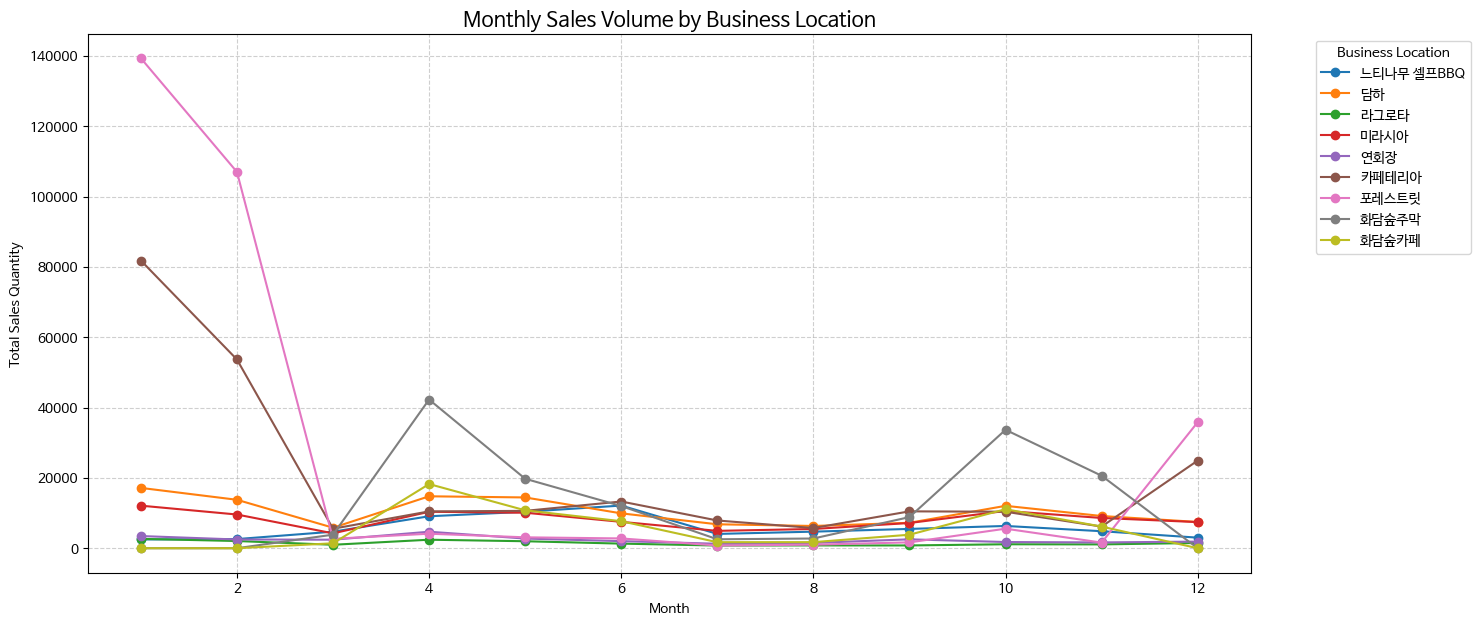

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (필요 시)
# plt.rc('font', family='NanumBarunGothic')

# 월별, 영업장별 매출 합계 계산
monthly_sales = train_clean.groupby(['월', '영업장명'])['매출수량'].sum().unstack().fillna(0)

# 시각화 (영업장별 월별 매출 추이)
monthly_sales.plot(kind='line', marker='o', figsize=(15, 7))
plt.title('Monthly Sales Volume by Business Location', fontsize=15)
plt.ylabel('Total Sales Quantity')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Business Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1월 매출이 제일 높음  
(포레스트릿, 카페테리아 상위권)  
전반적으로 겨울 매출에서 강세 보임-겨울철 액티비티와 강한 연관 있을 것 같음    

4월, 10월에서 화담숲주막의 매출 상승  
화담숲카페도 동반 상승(이름이 비슷하니까 근처에 위치하나 싶음)



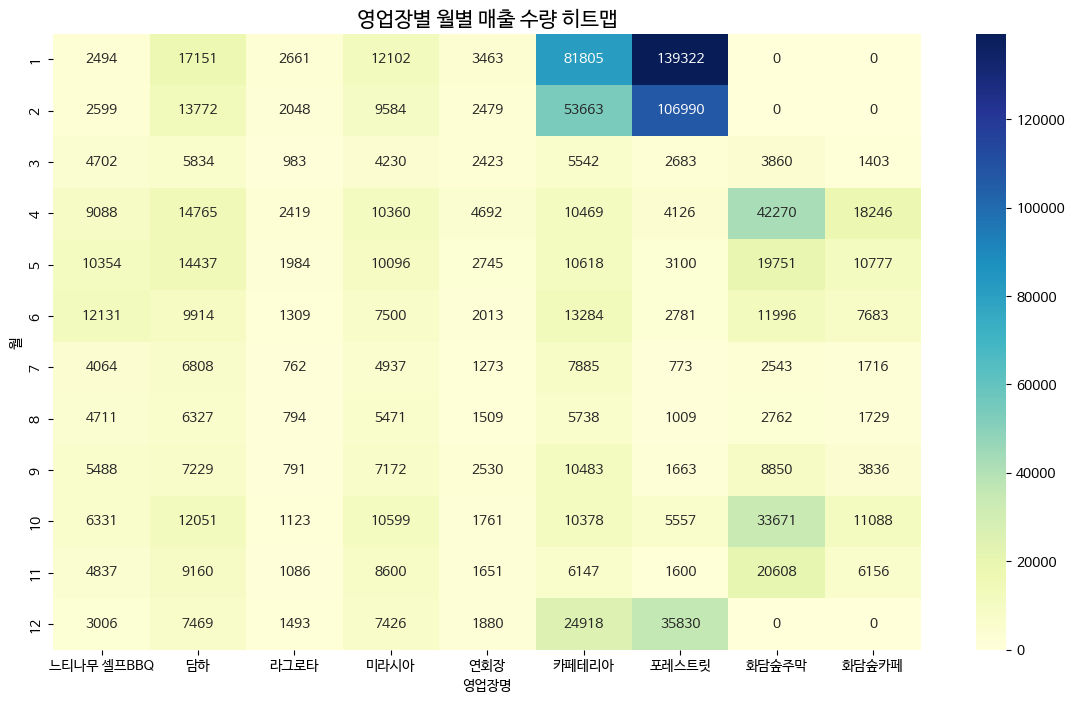

In [56]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('영업장별 월별 매출 수량 히트맵', fontsize=15)
plt.show()

> 계절성 패턴 강하게 보임

겨울시즌(12~2월) : 포레스트릿, 카페테리아
- 압도적 매출 상승
- 꼬치어묵, 떡볶이 등 겨울 액티비티 관련성 추측


가을 시즌(10~11월): 화담숲주막, 화담숲카페
- 매출 급증
- 단풍시즌 화담숲 방문객이 주막-카페 이용하는듯?
- 해물파전 등 계절성 메뉴
- 특이점: 겨울시즌 화담숲주막/화담숲카페는 매출수량 0, 동절기 휴장 가능성 추측

봄 시즌(4월): 화담숲주막, 화담숲카페
- 봄꽃 시즌인가 싶음

## 정리

월별 분석시 특정 매장의 특정 메뉴가 유의미한 매출 상승 지표 가짐.  
월별 따로 움직이기보단 2-3개월의 흐름을 가지고 계절성 패턴을 가짐  
계절별 수요 변화를 잡을 수 있도록 파생변수나 가중치 반영해주면 좋을 것 같음

## 파생변수 생성



- '메뉴_판매순위': 월별 판매순위  
해당 월 내에서 해당 메뉴의 판매 순위  
계절에 따른 고객의 선호도 변화 추적

- '메뉴_비중': 메뉴 비중(구성비)  
해당 월의 전체 판매량 대비 해당 메뉴의 판매 비중   
전체적인 업장 흐름 속 메뉴의 인기도 파악에 활용.  
특정 메뉴의 판매량이 절대적으로 감소하더라도 판매 비중이 유지된다면 여전히 인기메뉴로 볼 수 있음. 단순 수량 변화보다 안정적 예측 가능

- '비중_증감폭': 전월 대비 구성비의 증감폭  
인기가 상승중인지 하락중인지 추세 반영(계절 시작했는지 계절 끝나가는 중인지)

- '주말여부'  
전처리 단계에서 이미 생성함. 이진변수(평일은 0, 주말은 1)

- '휴점여부'  
7일 연속 판매량이 0일 경우 휴점'으로 판단하는 이동창(Rolling Window) 방식으로 생성.

In [57]:
# 월별 메뉴별 총 판매량 집계부터
monthly_agg = train_clean.groupby(['연도', '월', '영업장명', '메뉴명'])['매출수량'].sum().reset_index()
monthly_agg.rename(columns={'매출수량': '월간_메뉴_총판매량'}, inplace=True)

# 월별 전체 판매량 계산 후 구성비 계산
total_monthly_sales = monthly_agg.groupby(['연도', '월', '영업장명'])['월간_메뉴_총판매량'].transform('sum')
monthly_agg['메뉴_비중'] = monthly_agg['월간_메뉴_총판매량'] / total_monthly_sales

# 월별 판매 순위 생성
# 동일할 경우 'min' 방식으로 매김
monthly_agg['메뉴_판매순위'] = monthly_agg.groupby(['연도', '월', '영업장명'])['월간_메뉴_총판매량'].rank(ascending=False, method='min')

# 전월 대비 구성비의 증감폭
# 메뉴별로 시계열 순서에 따라 이전 행과의 차이 계산
monthly_agg = monthly_agg.sort_values(['영업장명', '메뉴명', '연도', '월'])
monthly_agg['비중_증감폭'] = monthly_agg.groupby(['영업장명', '메뉴명'])['메뉴_비중'].diff().fillna(0)

In [58]:
# 기존 데이터프레임에 결합
# '영업장명'과 '메뉴명'을 키로 각 일자별 데이터에 매칭
df_final = pd.merge(train_clean,
                    monthly_agg[['연도', '월', '영업장명', '메뉴명', '메뉴_비중', '메뉴_판매순위', '비중_증감폭']],
                    on=['연도', '월', '영업장명', '메뉴명'], how='left')

'휴점여부' 파생변수 추가함

In [59]:
def add_detailed_off_status(df, window=7):
    # 분석의 정확성을 위해 날짜순 정렬
    df = df.sort_values(['영업장명', '영업일자'])
    df['휴점여부'] = 0

    # 영업장별로 루프를 돌며 판단 (해당 영업장이 문 닫으면 모든 메뉴 판매량이 0이 될 것을 가정함)
    for shop in df['영업장명'].unique():
        # 해당 영업장의 일자별 총 매출 수량 계산
        shop_daily = df[df['영업장명'] == shop].groupby('영업일자')['매출수량'].sum().reset_index()

        # window 기간 동안 매출 합계가 0인지 확인
        is_zero = shop_daily['매출수량'] == 0
        rolling_zero = is_zero.rolling(window=window).sum() == window

        # 휴점으로 판단된 날짜들 추출
        off_dates = shop_daily.loc[rolling_zero, '영업일자']

        # 원본 데이터프레임에 반영 - 특정 날짜에 해당 영업장의 모든 메뉴 행을 휴점으로 표시
        for off_date in off_dates:
            # rolling이 끝나는 지점부터 역으로 window만큼 휴점 처리
            start_date = off_date - pd.Timedelta(days=window-1)
            mask = (df['영업장명'] == shop) & (df['영업일자'] >= start_date) & (df['영업일자'] <= off_date)
            df.loc[mask, '휴점여부'] = 1

    return df

# 적용
df_final = add_detailed_off_status(df_final)

In [60]:
df_final.head()

,영업일자,연도,월,일,요일,주말여부,영업장명,메뉴명,매출수량,메뉴_비중,메뉴_판매순위,비중_증감폭,휴점여부
0,2023-01-01,2023,1,1,일,1,느티나무 셀프BBQ,1인 수저세트,0,0.027244,8.0,0.0,0
532,2023-01-01,2023,1,1,일,1,느티나무 셀프BBQ,BBQ55(단체),0,0.070513,7.0,0.0,0
1064,2023-01-01,2023,1,1,일,1,느티나무 셀프BBQ,"대여료 30,000원",9,0.133013,3.0,0.0,0
1596,2023-01-01,2023,1,1,일,1,느티나무 셀프BBQ,"대여료 60,000원",2,0.086538,6.0,0.0,0
2127,2023-01-01,2023,1,1,일,1,느티나무 셀프BBQ,"대여료 90,000원",0,0.012821,10.0,0.0,0
